## K-Nearest Neighbors (KNN) Classification
In this notebook, we'll implement the K-Nearest Neighbors (KNN) algorithm. We'll go through each step in detail, explaining the concepts and code to ensure a thorough understanding.

In [1]:
# Importing necessary libraries

# Import pandas for data manipulation and analysis
import pandas as pd

# Import matplotlib for data visualization
import matplotlib.pyplot as plt

# Import datasets module from scikit-learn to load example datasets
from sklearn import datasets

# Import train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Import cross_val_score to evaluate model performance using cross-validation
from sklearn.model_selection import cross_val_score

In [2]:
# Load the breast cancer dataset from scikit-learn's datasets module
dataset = datasets.load_breast_cancer()

# Display the dataset object
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
# Split the dataset into training and testing sets

# Use train_test_split to split the data into training and testing sets
# dataset.data contains the features
# dataset.target contains the labels
# train_size=0.2 specifies that 20% of the data will be used for training
# random_state=42 ensures reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(dataset.data, dataset.target, train_size=0.2, random_state=42)

In [4]:
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Initialize a K-Nearest Neighbors classifier
knn = KNeighborsClassifier()

In [5]:
# Train the K-Nearest Neighbors classifier using the training data
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [6]:
# Evaluate the K-Nearest Neighbors classifier using cross-validation on the training data

# Use cross_val_score to perform cross-validation
# The function returns an array of scores for each fold
score = cross_val_score(knn, X_train, Y_train)

# Display the individual cross-validation scores and their mean
score, score.mean()

(array([0.86956522, 0.91304348, 0.91304348, 0.90909091, 0.81818182]),
 0.8845849802371542)

In [7]:
# Generate a list of odd values for k (number of neighbors) ranging from 1 to 25
# Create a range object for k values from 1 to 25 with a step of 2
k_values = range(1, 26, 2)

# Convert the range object to a list and display the list of k values
list(k_values)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

In [8]:
# Initialize empty lists to store k values and their corresponding mean cross-validation scores
x = []
y = []

# Iterate over each k value in k_values
for k in k_values:
    # Initialize a K-Nearest Neighbors classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the classifier using the training data
    knn.fit(X_train, Y_train)
    
    # Evaluate the classifier using cross-validation on the training data
    score = cross_val_score(knn, X_train, Y_train)
    
    # Append the current k value and its mean cross-validation score to the lists
    x.append(k)
    y.append(score.mean())
    
    # Print the current k value and its mean cross-validation score
    print("k value is:", k, "score is:", score.mean())

k value is: 1 score is: 0.8316205533596838
k value is: 3 score is: 0.8936758893280633
k value is: 5 score is: 0.8845849802371542
k value is: 7 score is: 0.8671936758893282
k value is: 9 score is: 0.875889328063241
k value is: 11 score is: 0.8845849802371542
k value is: 13 score is: 0.8849802371541502
k value is: 15 score is: 0.8845849802371542
k value is: 17 score is: 0.8849802371541502
k value is: 19 score is: 0.867588932806324
k value is: 21 score is: 0.8762845849802371
k value is: 23 score is: 0.8762845849802371
k value is: 25 score is: 0.84901185770751


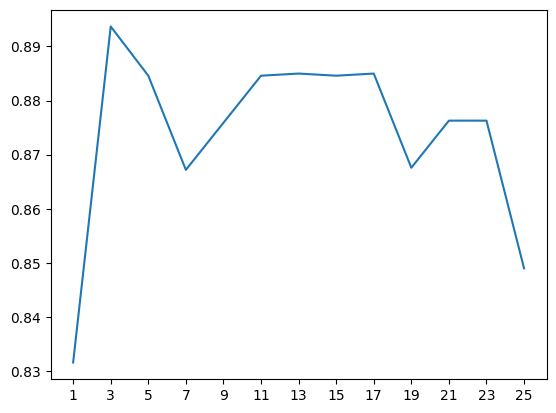

In [9]:
# Plot the mean cross-validation scores against the k values

# Plot the k values (x-axis) against their corresponding mean cross-validation scores (y-axis)
plt.plot(x, y)

# Set the x-ticks to the range from 1 to 25 with a step of 2
plt.xticks(range(1, 26, 2))

# Display the plot
plt.show()